In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

warnings.filterwarnings('ignore')

In [32]:
# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 5000
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)
df.describe()

,WallArea,RoofArea,OverallHeight,GlazingArea,EnergyEfficiency
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,299.65980,149.527600,6.466271,0.490988,30.284825
std,57.78248,28.915187,2.032479,0.289699,11.789915
min,200.00000,100.000000,3.001053,0.000166,10.009223
25%,249.00000,125.000000,4.678763,0.241479,20.004850
50%,301.00000,149.000000,6.430738,0.485071,30.628398
75%,350.00000,175.000000,8.236488,0.742067,40.692944
max,399.00000,199.000000,9.999846,0.999962,49.994211


In [33]:
# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

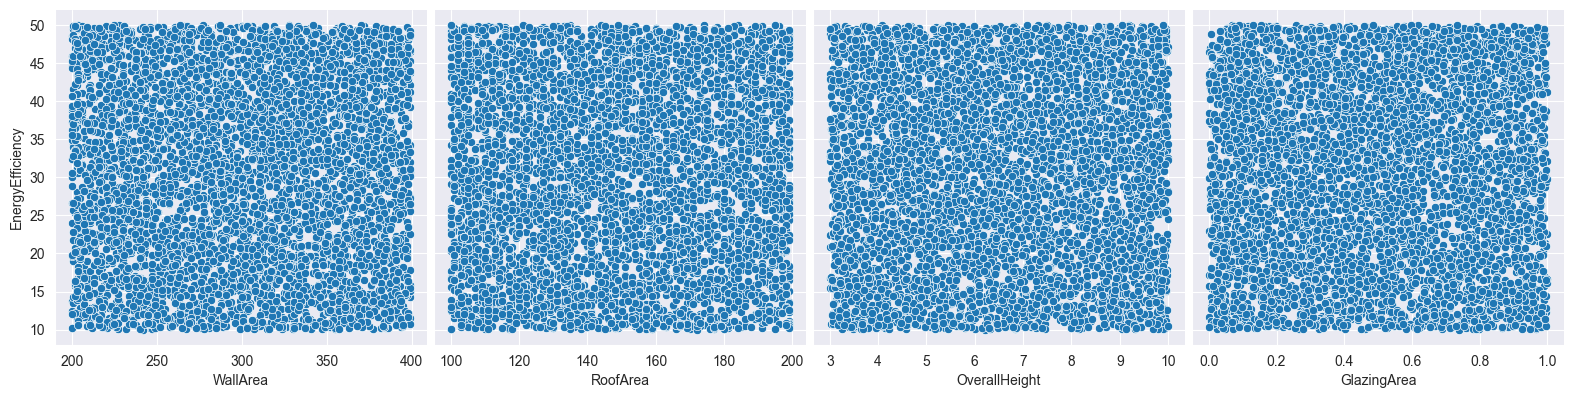

In [34]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4,
             aspect=1, kind='scatter')
plt.show()

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 11.921343029260004


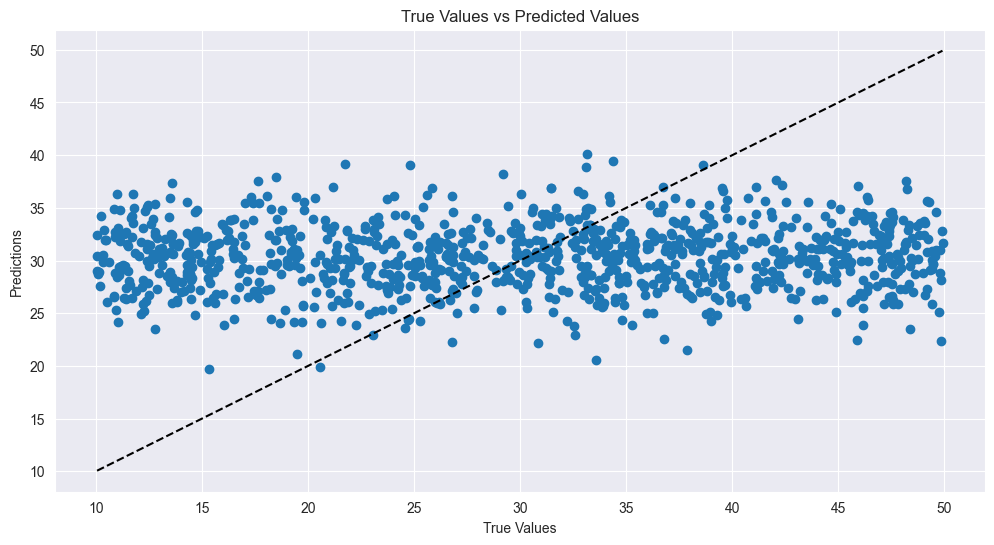

In [36]:
# Plot the True values vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()